In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

<span style="font-size: 20px">Gradient Boosting</span>

In [2]:
df = pd.read_csv("feature_engineered_stock_data.csv")
print(df.info())

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility_10'] = df['Close'].rolling(window=10).std()

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1255 non-null   object 
 1   Stock         1255 non-null   object 
 2   Open          1255 non-null   float64
 3   High          1255 non-null   float64
 4   Low           1255 non-null   float64
 5   Close         1255 non-null   float64
 6   Volume        1255 non-null   int64  
 7   SMA_50        1010 non-null   float64
 8   Close_Lag_1   1250 non-null   float64
 9   Close_Lag_3   1240 non-null   float64
 10  Close_Lag_7   1220 non-null   float64
 11  SMA_7         1225 non-null   float64
 12  SMA_30        1110 non-null   float64
 13  Daily_Return  1250 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 137.4+ KB
None


In [3]:
X = df[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'Close_Lag_1', 'Close_Lag_3', 
        'Close_Lag_7', 'SMA_7', 'SMA_30', 'Daily_Return', 'SMA_10', 'Volatility_10']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
gbr = GradientBoostingRegressor(
    n_estimators=300, 
    learning_rate=0.05,  
    max_depth=4, 
    min_samples_split=5, 
    loss="squared_error"
)

gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_split=5,
                          n_estimators=300)

Model Performance: MAE = 5.9869, RMSE = 14.7300


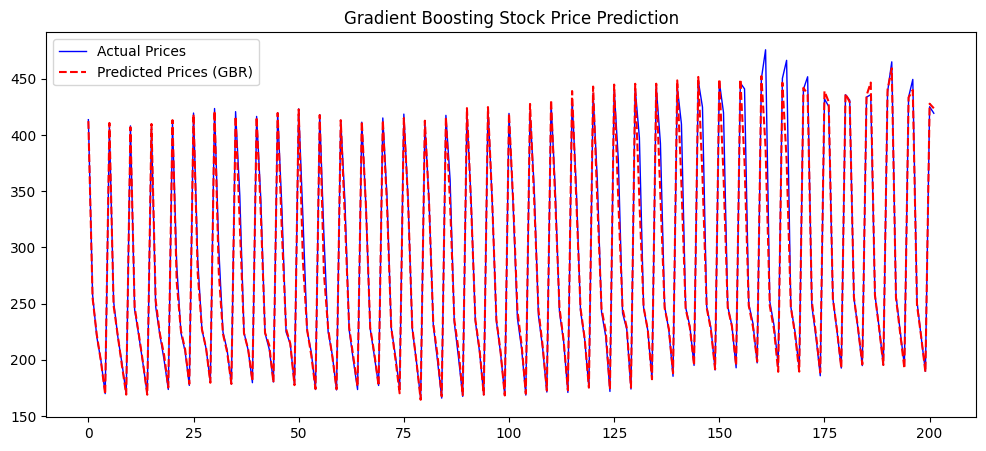

In [6]:
y_pred = gbr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance: MAE = {mae:.4f}, RMSE = {rmse:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual Prices", color="blue", linewidth=1)
plt.plot(y_pred, label="Predicted Prices (GBR)", linestyle="dashed", color="red")
plt.title("Gradient Boosting Stock Price Prediction")
plt.legend()
plt.show()

<span style="font-size: 20px">Improved Gradient Boosting</span>

In [7]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}


gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

In [8]:
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_split=10,
                          n_estimators=300)

Improved Model Performance: MAE = 5.3895, RMSE = 11.7057


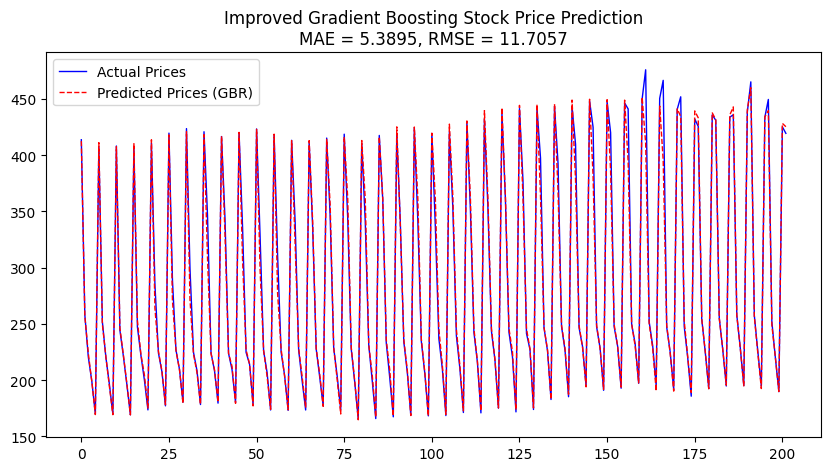

In [9]:
y_pred = best_gbr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Improved Model Performance: MAE = {mae:.4f}, RMSE = {rmse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color="blue", linewidth=1)
plt.plot(y_pred, label="Predicted Prices (GBR)", color="red", linestyle="dashed", linewidth=1)
plt.title(f"Improved Gradient Boosting Stock Price Prediction\nMAE = {mae:.4f}, RMSE = {rmse:.4f}")
plt.legend()
plt.show()

In [10]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5 
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

RMSE: 11.7057
MAE: 5.3895
MAPE: 1.62%
Model Accuracy: 98.38%
